# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units=metric&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp =city_weather["main"]["temp_max"]

        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | vorkuta
Processing Record 3 of Set 1 | sola
Processing Record 4 of Set 1 | elverum
Processing Record 5 of Set 1 | stanley
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | paramaribo
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | kuta
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | turka
Processing Record 13 of Set 1 | rossosh'
Processing Record 14 of Set 1 | margaret river
Processing Record 15 of Set 1 | tazacorte
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | taulaga
Processing Record 18 of Set 1 | seoni malwa
Processing Record 19 of Set 1 | kigonsera
Processing Record 20 of Set 1 | olonkinbyen
Processing Record 21 of Set 1 | khanty-mansiysk
Processing Record 22 of Set 1 | smirnykh
Processing Record 23 of

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,4.00,82,100,2.88,GS,1736445377
1,vorkuta,67.5000,64.0000,-14.50,88,100,6.58,RU,1736445378
2,sola,-13.8833,167.5500,26.49,81,98,2.10,VU,1736445379
3,elverum,60.8819,11.5623,-8.74,96,99,1.55,NO,1736445380
4,stanley,54.8680,-1.6985,-1.57,81,0,4.63,GB,1736445382


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,4.00,82,100,2.88,GS,1736445377
1,vorkuta,67.5000,64.0000,-14.50,88,100,6.58,RU,1736445378
2,sola,-13.8833,167.5500,26.49,81,98,2.10,VU,1736445379
3,elverum,60.8819,11.5623,-8.74,96,99,1.55,NO,1736445380
4,stanley,54.8680,-1.6985,-1.57,81,0,4.63,GB,1736445382


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

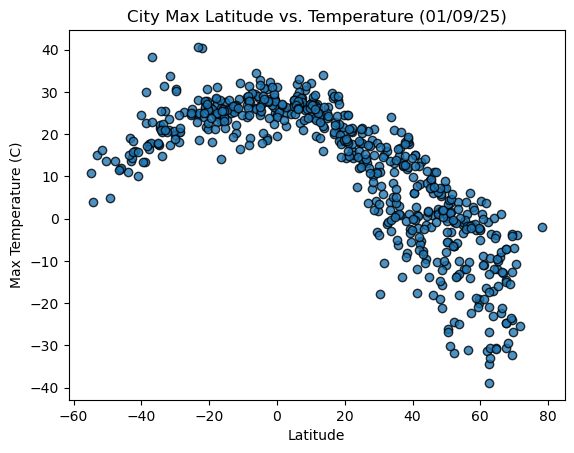

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

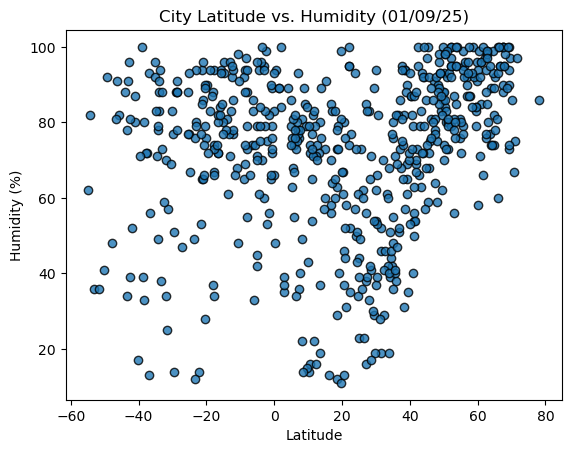

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure

plt.savefig("output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

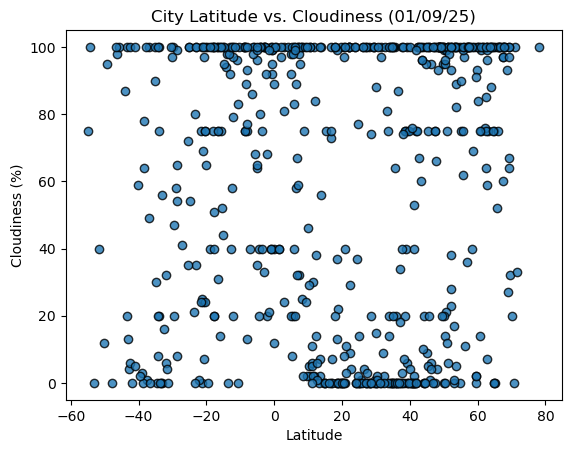

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

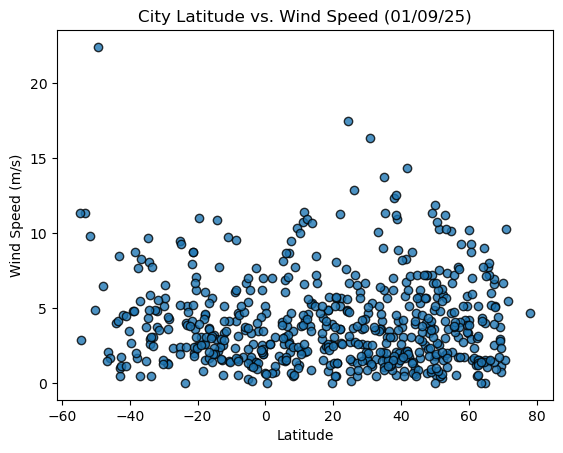

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r^value is: {rvalue}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorkuta,67.5000,64.0000,-14.50,88,100,6.58,RU,1736445378
3,elverum,60.8819,11.5623,-8.74,96,99,1.55,NO,1736445380
4,stanley,54.8680,-1.6985,-1.57,81,0,4.63,GB,1736445382
6,paramaribo,5.8667,-55.1667,31.95,55,40,3.09,SR,1736445384
11,turka,49.1541,23.0297,7.23,83,100,7.17,UA,1736445390


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,4.00,82,100,2.88,GS,1736445377
2,sola,-13.8833,167.5500,26.49,81,98,2.10,VU,1736445379
5,punta arenas,-53.1500,-70.9167,15.06,36,0,11.32,CL,1736445383
7,hithadhoo,-0.6000,73.0833,27.97,72,92,1.92,MV,1736445385
8,invercargill,-46.4000,168.3500,11.68,91,98,2.07,NZ,1736445386


###  Temperature vs. Latitude Linear Regression Plot

The r^value is: -0.853365725381542


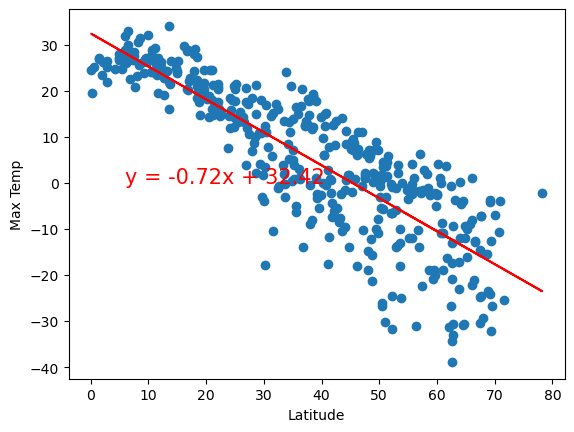

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, 0))

The r^value is: 0.6197721492757766


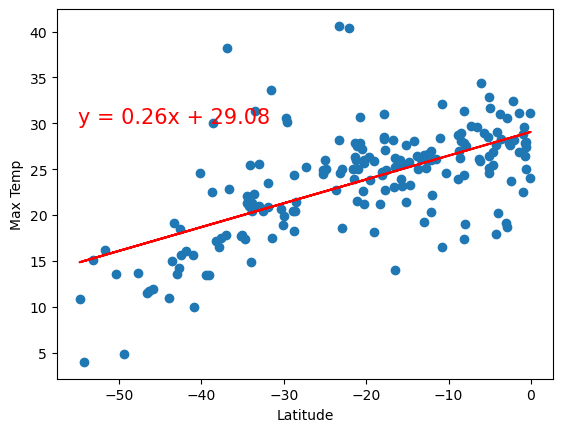

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 30))

Since in North hampshire higher latitudes are closer to the North Pole, which is colder.That's why rvalue is negative and shows with increasing in latitude ,we have decreasing in tempeture. this will be reverse for south hampshire and rvalue shows positive. since in south hampshire increasing latitudes means we are close to equator that get warmer.


### Humidity vs. Latitude Linear Regression Plot

The r^value is: 0.46847938431311653


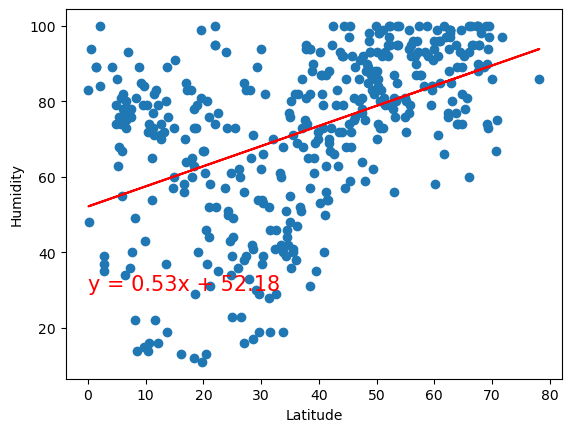

In [30]:
# Northern Hemisphere
# Max Temp vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (0, 30))

The r^value is: 0.2106060875429942


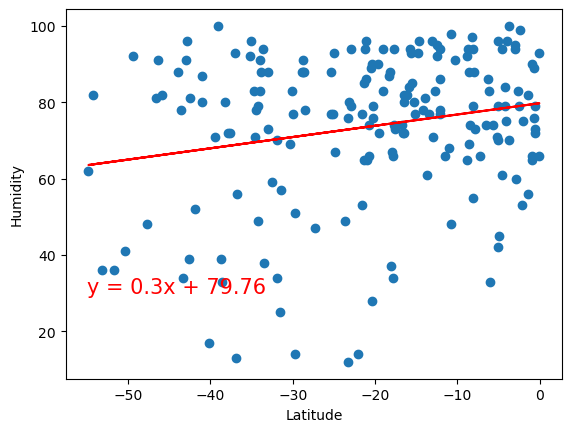

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55, 30))

rvalue shows for both positive since as latitude increases moving from the equator the humidity also increases.

### Cloudiness vs. Latitude Linear Regression Plot

The r^value is: 0.22340951196850883


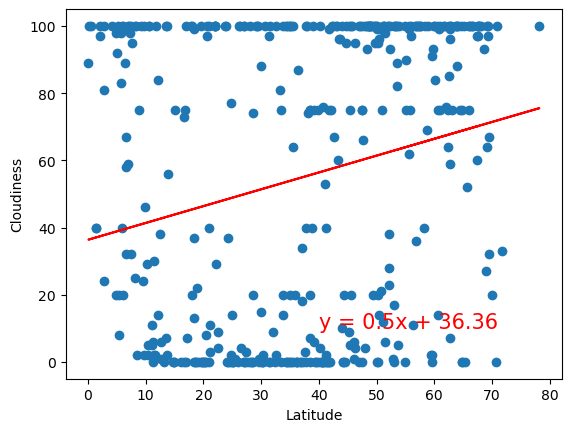

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 10))

The r^value is: 0.2930351661496506


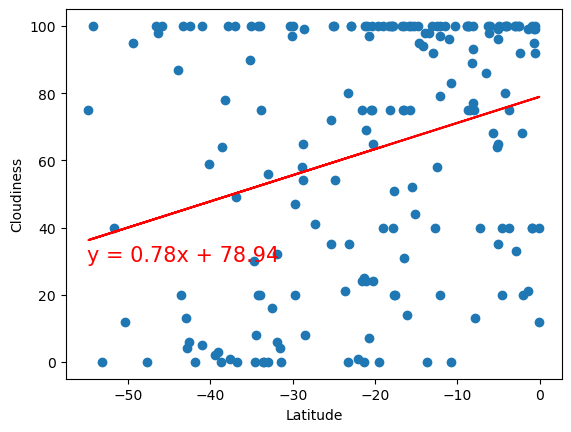

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 30))

rvalue shows for both positive since as latitude increases moving from the equator the cloudiness also increases. That's the reason both linear regression plots are positive for North newhampshire and south newhamshire

### Wind Speed vs. Latitude Linear Regression Plot

The r^value is: 0.007356240593829186


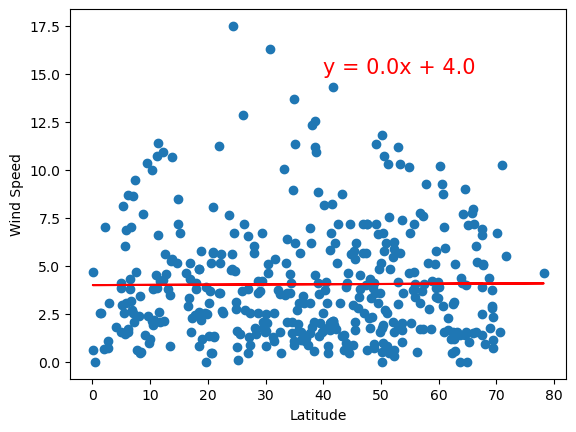

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (40, 15))

The r^value is: -0.24844079335025815


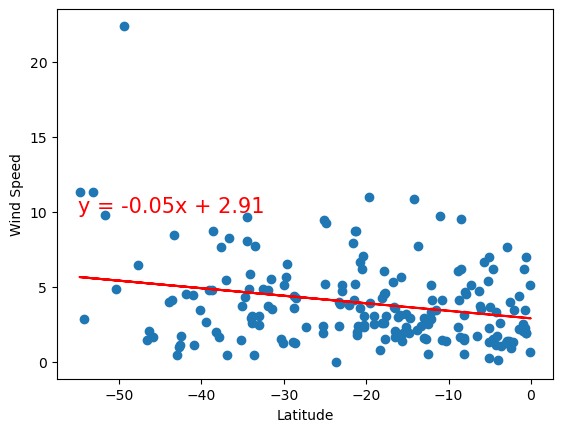

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-55, 10))

Since in North hampshire higher latitudes are closer to the North Pole, which is colder and it's more windy.That's why rvalue is positive and shows with increasing in latitude ,we have increasing in wind speed. this will be reverse for south hampshire and rvalue shows negative. since in south hampshire increasing latitudes means we are close to equator that get warmer and less windy.